# Классификация изображений

## Задача классификации

<b>Задача классификации изображений</b> – это базовая задача, которая относится к области компьютерного зрения.

Пусть дано множество классов (меток), например, {кот, собака, грузовик, самолёт, катер, …} и дано изображение некоторого объекта. Необходимо отнести это изображение к одному классу из заданных

<img src="images_cls/classify.svg" alt="Image classification" style="width: 800px; height: 400px;">

Задача классификации - это задача обучения с учителем, поэтому нам понадобятся размеченные данные.

## Простой пример

<b>Введение.</b> Рассмотрим простой вариант решения задачи классификации изображений на примере набора данных Fashion-MNIST. Этот набор данных является неплохой альтернативой набору MNIST (который уже всем надоел). Изображения из этого набора представляют собой фото различных элементов одежды, таким образом мы молучаем большую вариативность внутри каждого класса.

<img src="images_cls/fashion-mnist-sprite.png" alt="Fashion-MNIST preview" style="width: 600px; height: 600px;">

<center>Рис. Предпросмотр набора данных Fashion-MNIST</center>

In [58]:
# Импорты нужных нам библиотек и фреймворков
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(tf.__version__)

2.6.0


In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Пальто',
               'Сандалии', 'Рубаха', 'Кроссовки', 'Сумка', 'Полуботинки']

Посмотрим на характеристики набора данных

In [47]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


Каждое индивидуальное изображение должно быть полутоновым. Убедимся на примере, что изображения имеют размер 28x28, а значения интенсивности пикселей попадают в диапазон 0..255

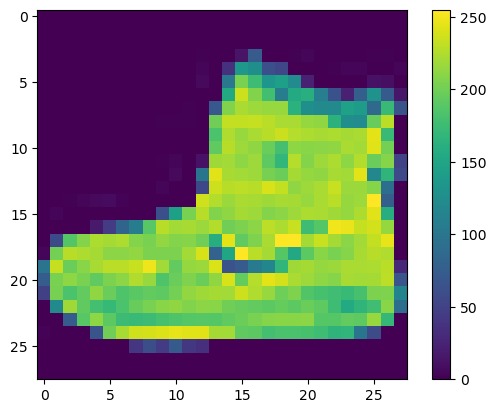

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Посмотрели - теперь приведём яркости к диапазону 0..1
train_images = train_images / 255.0
test_images = test_images / 255.0

Посмотрим на образцы

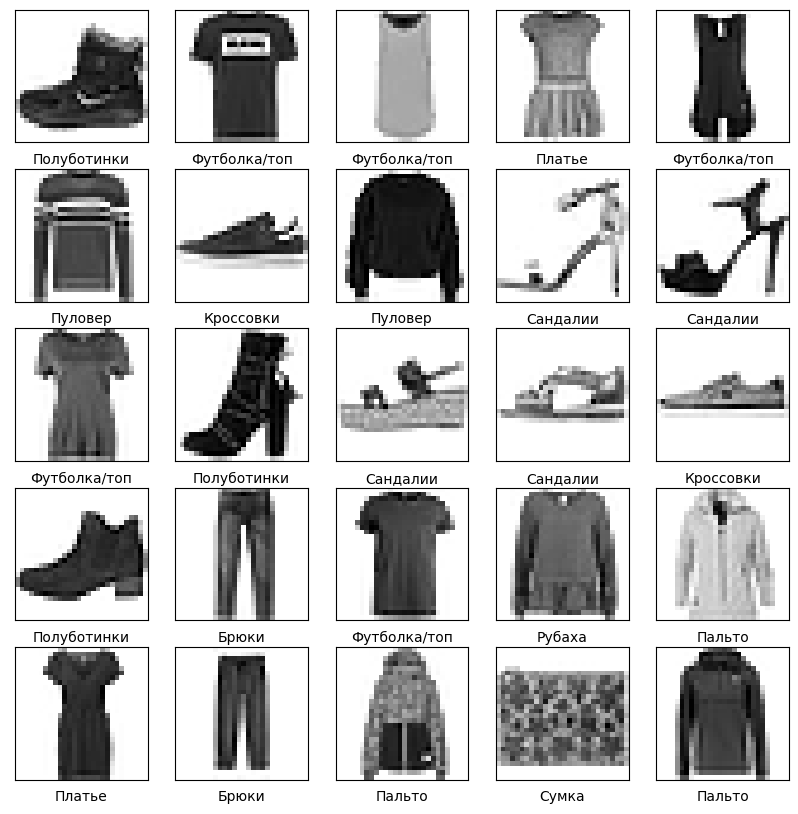

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Соберём простую модель. Раз изображения - сразу на свёрточных сетях.

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Компилируем модель

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

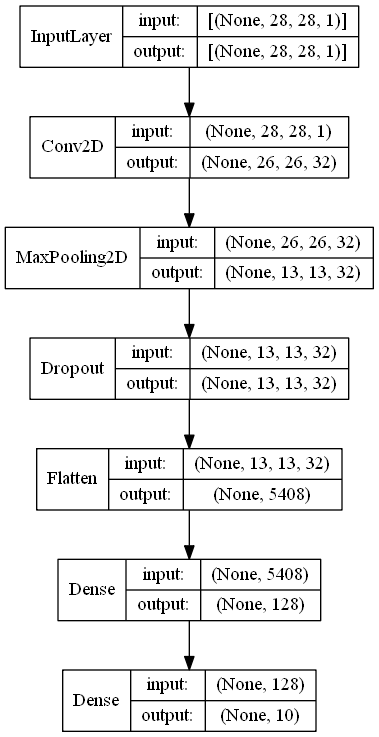

In [51]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

Обучим нашу сеть

In [52]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
history = model.fit(train_images, train_labels, batch_size=256, epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
188/188 [==============================] - 3s 14ms/step - loss: 0.5325 - accuracy: 0.8139 - val_loss: 0.3710 - val_accuracy: 0.8695
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 0.3461 - accuracy: 0.8777 - val_loss: 0.3169 - val_accuracy: 0.8887
Epoch 3/10
188/188 [==============================] - 2s 11ms/step - loss: 0.3002 - accuracy: 0.8931 - val_loss: 0.2958 - val_accuracy: 0.8971
Epoch 4/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2793 - accuracy: 0.9007 - val_loss: 0.2885 - val_accuracy: 0.8982
Epoch 5/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2576 - accuracy: 0.9073 - val_loss: 0.2706 - val_accuracy: 0.9038
Epoch 6/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2428 - accuracy: 0.9120 - val_loss: 0.2595 - val_accuracy: 0.9070
Epoch 7/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2305 - accuracy: 0.9162 - val_loss: 0.2534 - val_accuracy: 0.9113

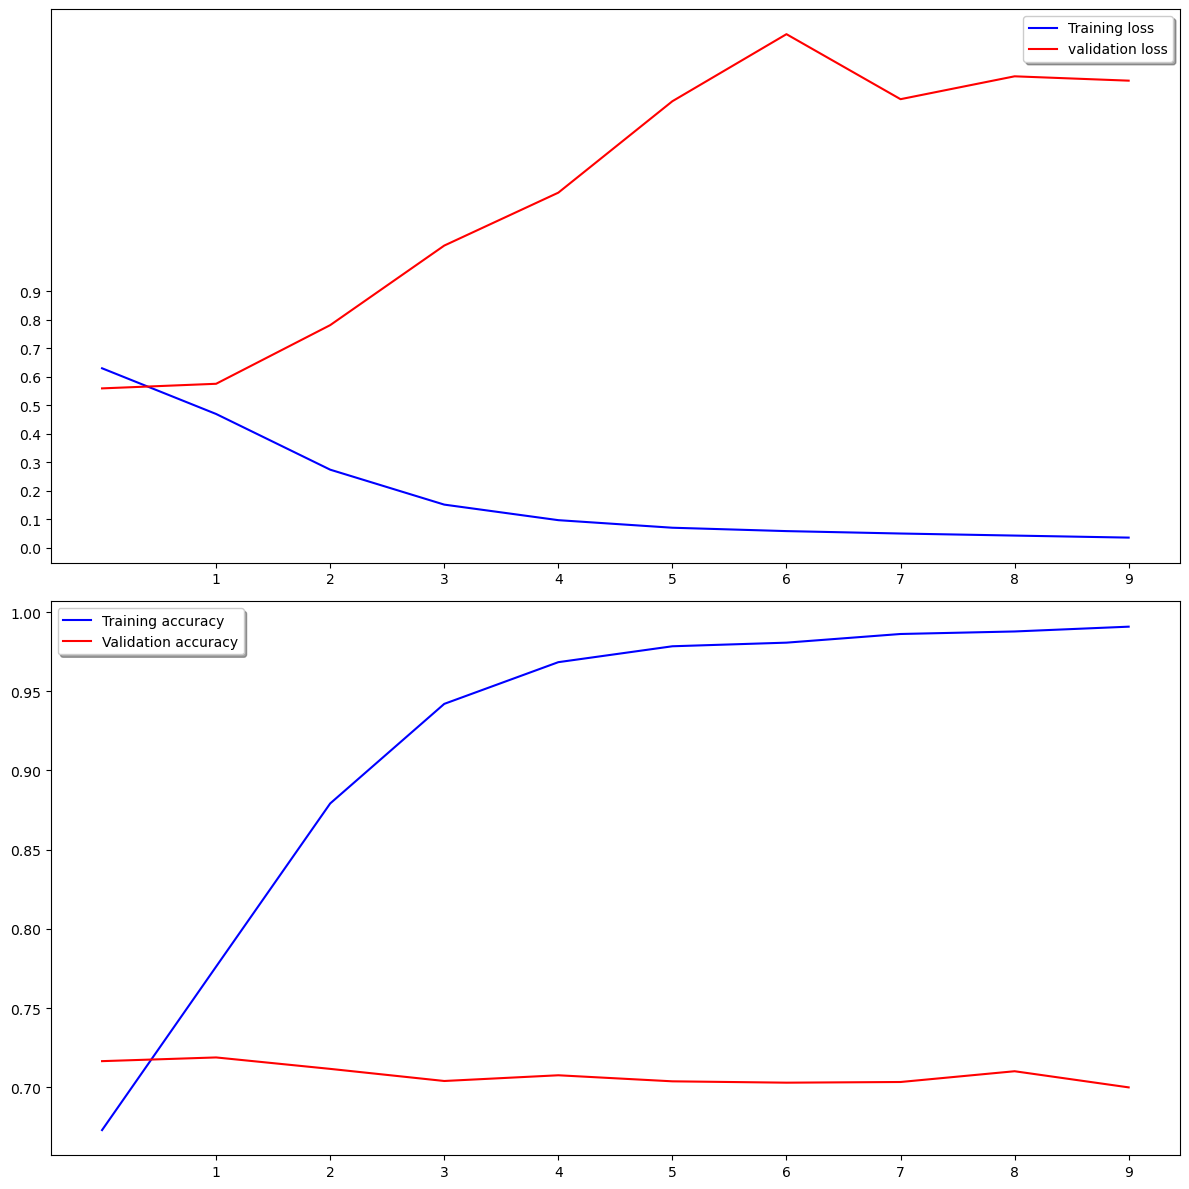

In [117]:
def learning_curves(history, epochs):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epochs, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))
    legend1 = ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs, 1))

    legend2 = ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

learning_curves(history, 10)

In [57]:
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

Футболка/топ       0.86      0.87      0.87      1000
       Брюки       0.99      0.98      0.98      1000
     Пуловер       0.84      0.87      0.86      1000
      Платье       0.89      0.93      0.91      1000
      Пальто       0.87      0.85      0.86      1000
    Сандалии       0.98      0.98      0.98      1000
      Рубаха       0.77      0.71      0.74      1000
   Кроссовки       0.95      0.97      0.96      1000
       Сумка       0.96      0.98      0.97      1000
 Полуботинки       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Проанализируем ошибки.

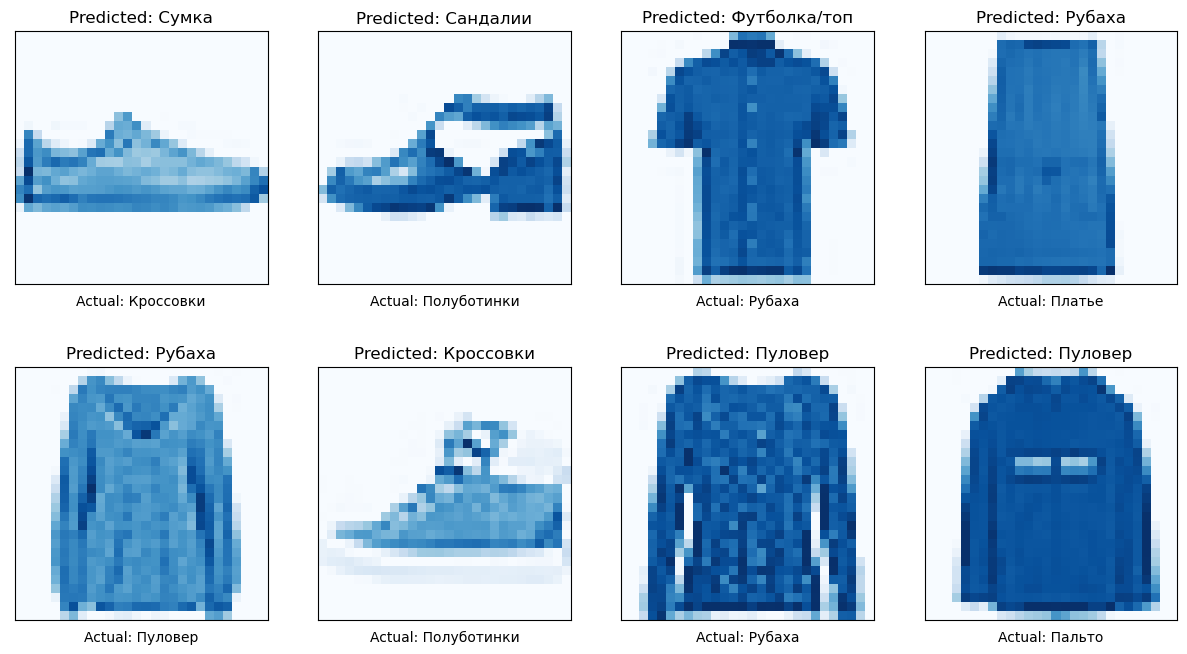

In [64]:
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap="Blues")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_labels[incorrect]]))

## Классификация на своих данных

В реальности, мы будем решать задачу классификации не на встроенных наборах, а на своих данных. Рассмотрим, как мы будем готовить наборы для обучения модели на примере датасета "Cats vs Dogs". Этот набор не является встроенным и представляет собой архив с изображениями.

In [74]:
# Раскомментируйте строки ниже, если будете запускать пример на *NIX системах или в Colab. Иначе распакуйте вручную
#!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
#!unzip -q kagglecatsanddogs_5340.zip

### Подготовка своего набора данных.

Набор данных для решения задачи классификации, как правило, имеет определённую структуру. При этом фреймворк TensorFlow и API Keras предполагают, что данные изображений будут предъявляться на вход модели в определённой структуре. Её примерный вид показан ниже на рис.

<img src="images_cls/dataset.png" alt="Image classification" style="width: 800px; height: 400px;">

Как видно из рисунка, предполагается, что для каждого класса будет создана директория, которая и будет содержать изображения объектов, которые относятся к ней.

In [75]:
import pathlib
data_dir = pathlib.Path("PetImages")

Отфильтруем испорченные изображения и побочные файлы, анализируя наличие корректного заголовка графического файла.

In [112]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            is_bmp = tf.compat.as_bytes("BM") in fobj.peek(0)
            is_gif = tf.compat.as_bytes("GIF89") in fobj.peek(0)
            is_png = tf.compat.as_bytes("PNG") in fobj.peek(1)
        finally:
            fobj.close()

        if not is_jfif and not is_bmp and not is_gif and not is_png:
            num_skipped += 1
            # Delete corrupted image
            print("corrupt:" + fpath)
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

corrupt:PetImages\Cat\10019.jpg
corrupt:PetImages\Cat\10036.jpg
corrupt:PetImages\Cat\10037.jpg
corrupt:PetImages\Cat\10070.jpg
corrupt:PetImages\Cat\10077.jpg
corrupt:PetImages\Cat\10117.jpg
corrupt:PetImages\Cat\10133.jpg
corrupt:PetImages\Cat\10135.jpg
corrupt:PetImages\Cat\10157.jpg
corrupt:PetImages\Cat\10187.jpg
corrupt:PetImages\Cat\10197.jpg
corrupt:PetImages\Cat\10209.jpg
corrupt:PetImages\Cat\10219.jpg
corrupt:PetImages\Cat\10235.jpg
corrupt:PetImages\Cat\1024.jpg
corrupt:PetImages\Cat\10244.jpg
corrupt:PetImages\Cat\10252.jpg
corrupt:PetImages\Cat\10308.jpg
corrupt:PetImages\Cat\1034.jpg
corrupt:PetImages\Cat\10354.jpg
corrupt:PetImages\Cat\10391.jpg
corrupt:PetImages\Cat\10404.jpg
corrupt:PetImages\Cat\10412.jpg
corrupt:PetImages\Cat\10472.jpg
corrupt:PetImages\Cat\10475.jpg
corrupt:PetImages\Cat\10487.jpg
corrupt:PetImages\Cat\10510.jpg
corrupt:PetImages\Cat\10530.jpg
corrupt:PetImages\Cat\10544.jpg
corrupt:PetImages\Cat\10550.jpg
corrupt:PetImages\Cat\1061.jpg
corrupt:Pet

corrupt:PetImages\Cat\4657.jpg
corrupt:PetImages\Cat\4666.jpg
corrupt:PetImages\Cat\4671.jpg
corrupt:PetImages\Cat\476.jpg
corrupt:PetImages\Cat\4781.jpg
corrupt:PetImages\Cat\4787.jpg
corrupt:PetImages\Cat\479.jpg
corrupt:PetImages\Cat\4791.jpg
corrupt:PetImages\Cat\4806.jpg
corrupt:PetImages\Cat\4823.jpg
corrupt:PetImages\Cat\4836.jpg
corrupt:PetImages\Cat\4867.jpg
corrupt:PetImages\Cat\4872.jpg
corrupt:PetImages\Cat\4873.jpg
corrupt:PetImages\Cat\4884.jpg
corrupt:PetImages\Cat\4885.jpg
corrupt:PetImages\Cat\4911.jpg
corrupt:PetImages\Cat\4913.jpg
corrupt:PetImages\Cat\4938.jpg
corrupt:PetImages\Cat\4951.jpg
corrupt:PetImages\Cat\496.jpg
corrupt:PetImages\Cat\4987.jpg
corrupt:PetImages\Cat\4992.jpg
corrupt:PetImages\Cat\5042.jpg
corrupt:PetImages\Cat\5061.jpg
corrupt:PetImages\Cat\5103.jpg
corrupt:PetImages\Cat\5114.jpg
corrupt:PetImages\Cat\5127.jpg
corrupt:PetImages\Cat\5152.jpg
corrupt:PetImages\Cat\5172.jpg
corrupt:PetImages\Cat\5218.jpg
corrupt:PetImages\Cat\5226.jpg
corrupt:Pet

corrupt:PetImages\Dog\10338.jpg
corrupt:PetImages\Dog\10381.jpg
corrupt:PetImages\Dog\10390.jpg
corrupt:PetImages\Dog\10395.jpg
corrupt:PetImages\Dog\10400.jpg
corrupt:PetImages\Dog\10403.jpg
corrupt:PetImages\Dog\10420.jpg
corrupt:PetImages\Dog\10447.jpg
corrupt:PetImages\Dog\10452.jpg
corrupt:PetImages\Dog\10467.jpg
corrupt:PetImages\Dog\10556.jpg
corrupt:PetImages\Dog\10601.jpg
corrupt:PetImages\Dog\10633.jpg
corrupt:PetImages\Dog\10665.jpg
corrupt:PetImages\Dog\10735.jpg
corrupt:PetImages\Dog\10738.jpg
corrupt:PetImages\Dog\10740.jpg
corrupt:PetImages\Dog\10756.jpg
corrupt:PetImages\Dog\10794.jpg
corrupt:PetImages\Dog\10816.jpg
corrupt:PetImages\Dog\1082.jpg
corrupt:PetImages\Dog\10827.jpg
corrupt:PetImages\Dog\10835.jpg
corrupt:PetImages\Dog\10838.jpg
corrupt:PetImages\Dog\10870.jpg
corrupt:PetImages\Dog\10879.jpg
corrupt:PetImages\Dog\10885.jpg
corrupt:PetImages\Dog\10902.jpg
corrupt:PetImages\Dog\10949.jpg
corrupt:PetImages\Dog\10952.jpg
corrupt:PetImages\Dog\10991.jpg
corrupt:P

corrupt:PetImages\Dog\4646.jpg
corrupt:PetImages\Dog\4652.jpg
corrupt:PetImages\Dog\4678.jpg
corrupt:PetImages\Dog\4698.jpg
corrupt:PetImages\Dog\4725.jpg
corrupt:PetImages\Dog\4746.jpg
corrupt:PetImages\Dog\4750.jpg
corrupt:PetImages\Dog\4751.jpg
corrupt:PetImages\Dog\4759.jpg
corrupt:PetImages\Dog\4765.jpg
corrupt:PetImages\Dog\4772.jpg
corrupt:PetImages\Dog\4783.jpg
corrupt:PetImages\Dog\4784.jpg
corrupt:PetImages\Dog\4815.jpg
corrupt:PetImages\Dog\482.jpg
corrupt:PetImages\Dog\4820.jpg
corrupt:PetImages\Dog\4838.jpg
corrupt:PetImages\Dog\4856.jpg
corrupt:PetImages\Dog\4864.jpg
corrupt:PetImages\Dog\4902.jpg
corrupt:PetImages\Dog\4970.jpg
corrupt:PetImages\Dog\4977.jpg
corrupt:PetImages\Dog\4981.jpg
corrupt:PetImages\Dog\4986.jpg
corrupt:PetImages\Dog\4996.jpg
corrupt:PetImages\Dog\5012.jpg
corrupt:PetImages\Dog\5018.jpg
corrupt:PetImages\Dog\5061.jpg
corrupt:PetImages\Dog\5066.jpg
corrupt:PetImages\Dog\5106.jpg
corrupt:PetImages\Dog\5160.jpg
corrupt:PetImages\Dog\5175.jpg
corrupt:P

In [113]:
image_size = (150, 150)
batch_size = 8

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23550 files belonging to 2 classes.
Using 18840 files for training.
Found 23550 files belonging to 2 classes.
Using 4710 files for validation.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Классифицирующая модель.

В качестве классификатора используем свёрточную нейронную сеть, сделав её чуть сложнее, чем в случае Fashion MNIST.

In [127]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [128]:
model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
input_shape=(150, 150, 3)

In [121]:
#train_images = np.expand_dims(train_images, -1)
#test_images = np.expand_dims(test_images, -1)
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
2355/2355 [==============================] - 46s 19ms/step - loss: 0.6050 - accuracy: 0.6682 - val_loss: 0.5065 - val_accuracy: 0.7505
Epoch 2/10
2355/2355 [==============================] - 43s 18ms/step - loss: 0.4746 - accuracy: 0.7749 - val_loss: 0.4492 - val_accuracy: 0.7934
Epoch 3/10
2355/2355 [==============================] - 43s 18ms/step - loss: 0.3697 - accuracy: 0.8327 - val_loss: 0.4890 - val_accuracy: 0.7909
Epoch 4/10
2355/2355 [==============================] - 43s 18ms/step - loss: 0.2205 - accuracy: 0.9044 - val_loss: 0.7154 - val_accuracy: 0.7839
Epoch 5/10
2355/2355 [==============================] - 43s 18ms/step - loss: 0.1178 - accuracy: 0.9559 - val_loss: 0.9089 - val_accuracy: 0.7917
Epoch 6/10
2355/2355 [==============================] - 43s 18ms/step - loss: 0.0747 - accuracy: 0.9738 - val_loss: 1.0307 - val_accuracy: 0.7938
Epoch 7/10
2355/2355 [==============================] - 44s 19ms/step - loss: 0.0643 - accuracy: 0.9778 - val_loss: 1.5824 -

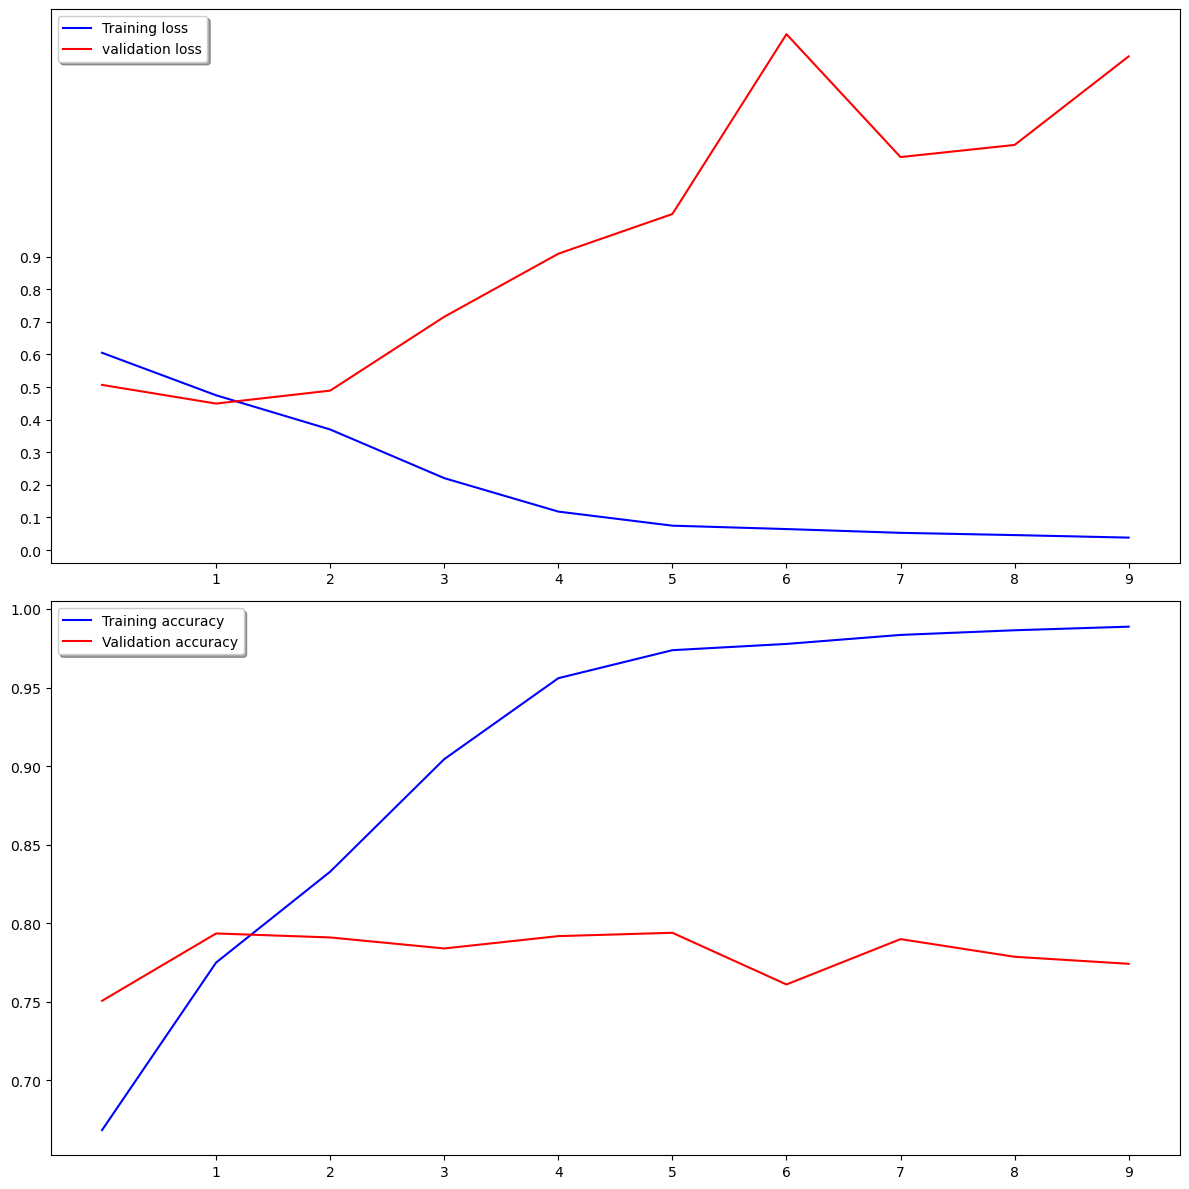

In [122]:
learning_curves(history, 10)

## Классифицирующая модель.

## Дополнение данных (обогащение, аугментация).